# Analyse et Visualisation des données de l'entreprise Innova Electronic

## Importer les bibliothèques

In [51]:
# Importer les bibliothèques

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Charge les données

In [52]:
# charger les données

ventes_mensuelles = pd.read_excel('C:\\Users\\Marie Josephe\\Downloads\\ventes-data.xlsx')
ventes_mensuelles

,Month,Product,Units Sold,Revenue
0,January,Smartphone,1000,50000
1,January,Laptop,500,100000
2,January,Tablet,300,45000
3,January,Smart TV,200,25000
4,January,Headphones,800,32000
...,...,...,...,...
583,December,Graphics Tablet,315,15750
584,December,Ink Cartridges,525,26250
585,December,Laptop Stand,210,10500
586,December,Portable Scanner,315,15750


## Explorer les données

In [11]:
# avoir un aperçu des données
ventes_mensuelles.head()

,Month,Product,Units Sold,Revenue
0,January,Smartphone,1000,50000
1,January,Laptop,500,100000
2,January,Tablet,300,45000
3,January,Smart TV,200,25000
4,January,Headphones,800,32000


In [12]:
 # vérifier s'il y a des valeurs aberrantes

ventes_mensuelles.describe()

,Units Sold,Revenue
count,588.000000,588.000000
mean,489.673469,31221.428571
std,343.815948,27426.671012
min,100.000000,3000.000000
25%,255.000000,12400.000000
50%,382.500000,24000.000000
75%,600.000000,41337.500000
max,2100.000000,210000.000000


In [13]:
# vérifier s'il y a des valeurs manquantes

ventes_mensuelles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       588 non-null    object
 1   Product     588 non-null    object
 2   Units Sold  588 non-null    int64 
 3   Revenue     588 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 18.5+ KB


In [14]:
# vérifier s'il y a des valeurs manquantes

ventes_mensuelles.isnull().sum()

Month         0
Product       0
Units Sold    0
Revenue       0
dtype: int64

In [118]:
# ajouter la colonne quantité
ventes_mensuelles['quantite']= ventes_mensuelles['Revenue']/ventes_mensuelles['Units Sold']

In [119]:
ventes_mensuelles

,Month,Product,Units Sold,Revenue,quantité,quantite
0,January,Smartphone,1000,50000,50.0,50.0
1,January,Laptop,500,100000,200.0,200.0
2,January,Tablet,300,45000,150.0,150.0
3,January,Smart TV,200,25000,125.0,125.0
4,January,Headphones,800,32000,40.0,40.0
...,...,...,...,...,...,...
583,December,Graphics Tablet,315,15750,50.0,50.0
584,December,Ink Cartridges,525,26250,50.0,50.0
585,December,Laptop Stand,210,10500,50.0,50.0
586,December,Portable Scanner,315,15750,50.0,50.0


In [120]:
del ventes_mensuelles['quantité']

In [121]:
ventes_mensuelles

,Month,Product,Units Sold,Revenue,quantite
0,January,Smartphone,1000,50000,50.0
1,January,Laptop,500,100000,200.0
2,January,Tablet,300,45000,150.0
3,January,Smart TV,200,25000,125.0
4,January,Headphones,800,32000,40.0
...,...,...,...,...,...
583,December,Graphics Tablet,315,15750,50.0
584,December,Ink Cartridges,525,26250,50.0
585,December,Laptop Stand,210,10500,50.0
586,December,Portable Scanner,315,15750,50.0


## Calculer les ventes totales, identifier les 5 produits les plus vendus et trouver les mois avec les ventes les plus élévées et les plus basses

In [34]:
# calculer les ventes totales

Somme_ventes_totales = ventes_mensuelles.groupby('Month') [['Revenue']].sum().sort_values('Revenue')
Somme_ventes_totales

,Revenue
Month,
January,987000
February,1085700
March,1184400
April,1283100
May,1381800
June,1480500
July,1579200
August,1677900
September,1776600


In [122]:
# Identifier les 5 produits les plus vendus chaque mois

produits = ventes_mensuelles.groupby(['Month','Product'])['quantite'].sum()
Top_5 = produits.groupby('Month', group_keys= False).nlargest(5)
produits
Top_5


Month      Product       
April      VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
August     VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
December   VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
February   VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
January    VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
July       VR Headset        250.0
           Drone             200.0
           Laptop            

In [126]:
# les mois ayant les ventes les plus élévées et les plus basses
ventes_mois_elevee = Somme_ventes_totales.tail(1)
ventes_mois_basse = Somme_ventes_totales.head(1)
print('le mois ayant les ventes les plus élévées est:', ventes_mois_elevee)
print('le mois ayant les ventes les plus basse est:', ventes_mois_basse)


le mois ayant les ventes les plus élévées est:           Revenue
Month            
December  2072700
le mois ayant les ventes les plus basse est:          Revenue
Month           
January   987000


In [17]:
mois_ventes_max = Somme_ventes_totales.idxmax()
mois_ventes_min = Somme_ventes_totales.idxmin()
print('')
print (f"Le mois avec les ventes les plus élevées est {mois_ventes_max}")
print (f"Le mois avec les ventes les plus basses est {mois_ventes_min}")


Le mois avec les ventes les plus élevées est Revenue    December
dtype: object
Le mois avec les ventes les plus basses est Revenue    January
dtype: object


## Graphique représentant les ventes mensuelles

<Figure size 1000x600 with 0 Axes>

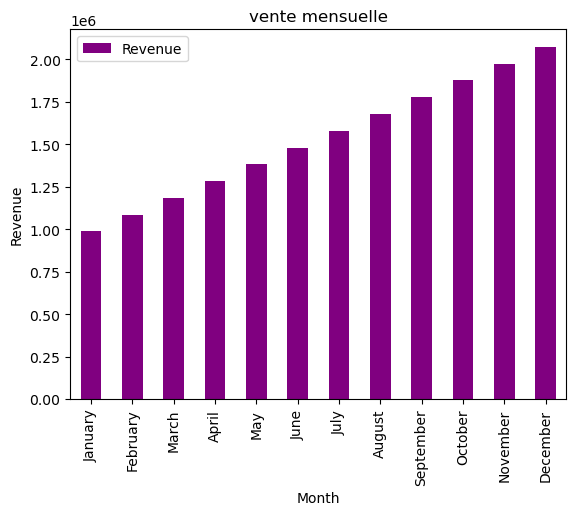

<Figure size 1200x800 with 0 Axes>

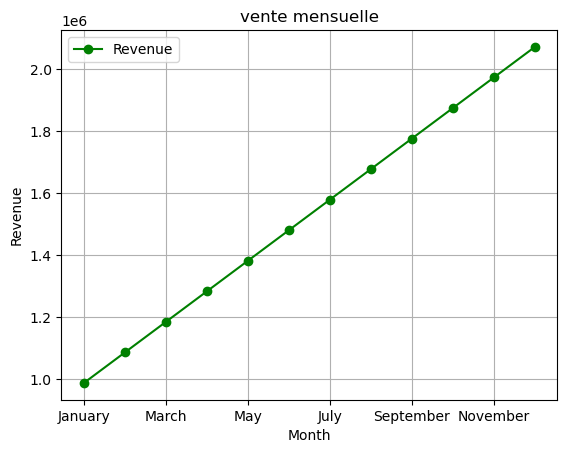

In [145]:

plt.figure(figsize=(10,6))
Somme_ventes_totales.plot(kind = 'bar', color='purple')
plt.title('vente mensuelle')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.figure(figsize=(12,8))
Somme_ventes_totales.plot(kind = 'line', color='green', marker ='o')
plt.title('vente mensuelle')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid()
plt.show()

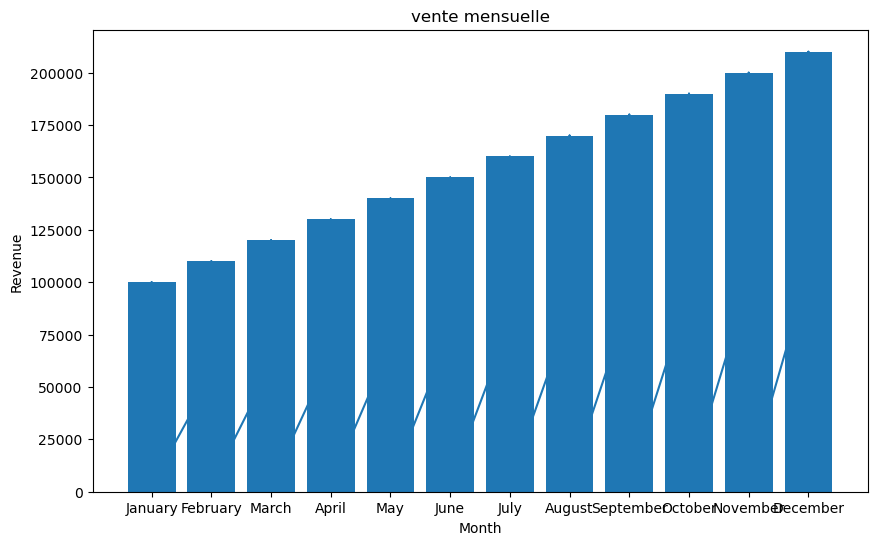

In [146]:
plt.figure(figsize=(10,6))
x = ventes_mensuelles['Month']
y = ventes_mensuelles['Revenue']
plt.bar(x,y)
plt.plot(x,y)
plt.title('vente mensuelle')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


## Graphique représentant les tendances de ventes et les produits les plus populaires

In [160]:
# graphique des ventes par produits
ventes_produits = ventes_mensuelles.groupby('Product') [['quantite']].sum().sort_values('quantite', ascending=False)
ventes_produits

,quantite
Product,
VR Headset,3000.0
Smart Home Hub,2400.0
Laptop,2400.0
Drone,2400.0
Game Console,1800.0
Laser Printer,1800.0
Graphics Card,1800.0
Tablet,1800.0
Smart TV,1500.0


In [169]:
produits = ventes_mensuelles.groupby('Product') [['Revenue']].sum().sort_values('Revenue', ascending=False)
produits.reset_index()

,Product,Revenue
0,Laptop,1860000
1,Smartphone,930000
2,Tablet,837000
3,Monitor,781200
4,Smart Home Hub,744000
5,Processor,744000
6,Game Console,697500
7,Wireless Speaker,669600
8,Headphones,595200
9,Drone,558000


<Figure size 1200x800 with 0 Axes>

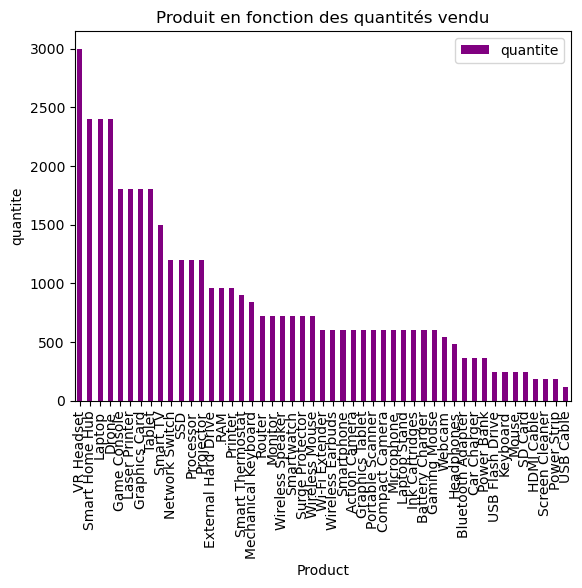

In [148]:
plt.figure(figsize=(12,8))
ventes_produits.plot(kind = 'bar', color='purple')
plt.xlabel('Product')
plt.ylabel('quantite')
plt.title('Produit en fonction des quantités vendu')
plt.show()

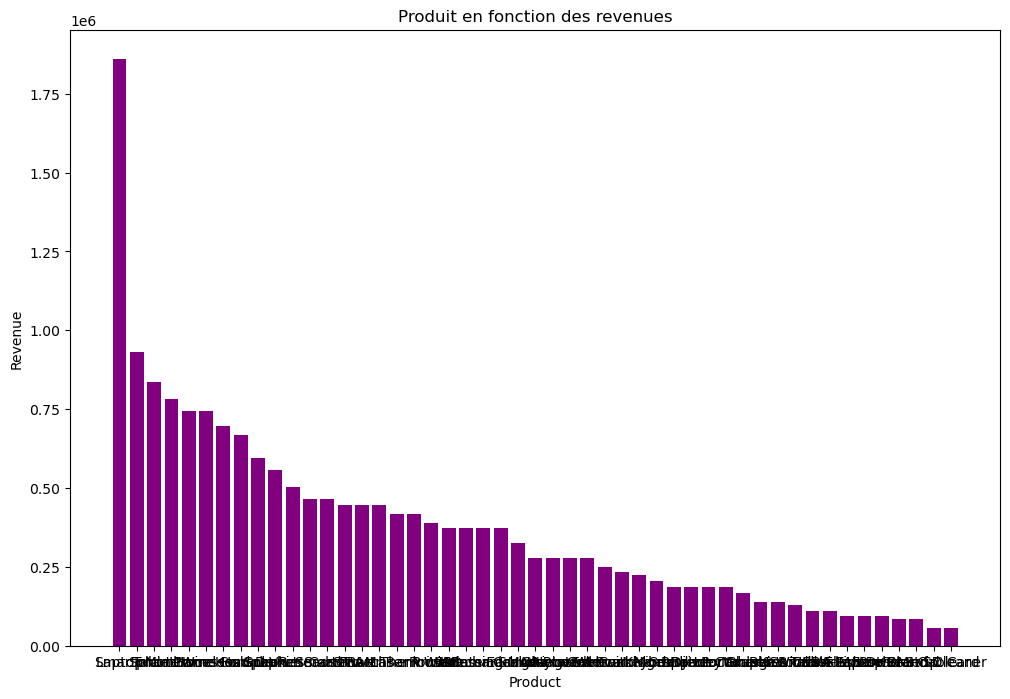

In [170]:
plt.figure(figsize=(12,8))
a=produits.reset_index()
x = a['Product']
y = a['Revenue']
plt.bar(x,y,color='purple')

plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Produit en fonction des revenues')
plt.show()

<Figure size 1200x800 with 0 Axes>

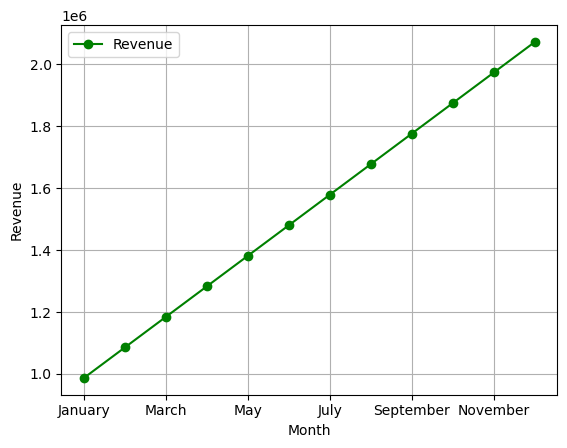

In [60]:
# evolution des ventes au fil du temps
plt.figure(figsize=(12,8))
Somme_ventes_totales.plot(kind = 'line', color='green', marker ='o')

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid()

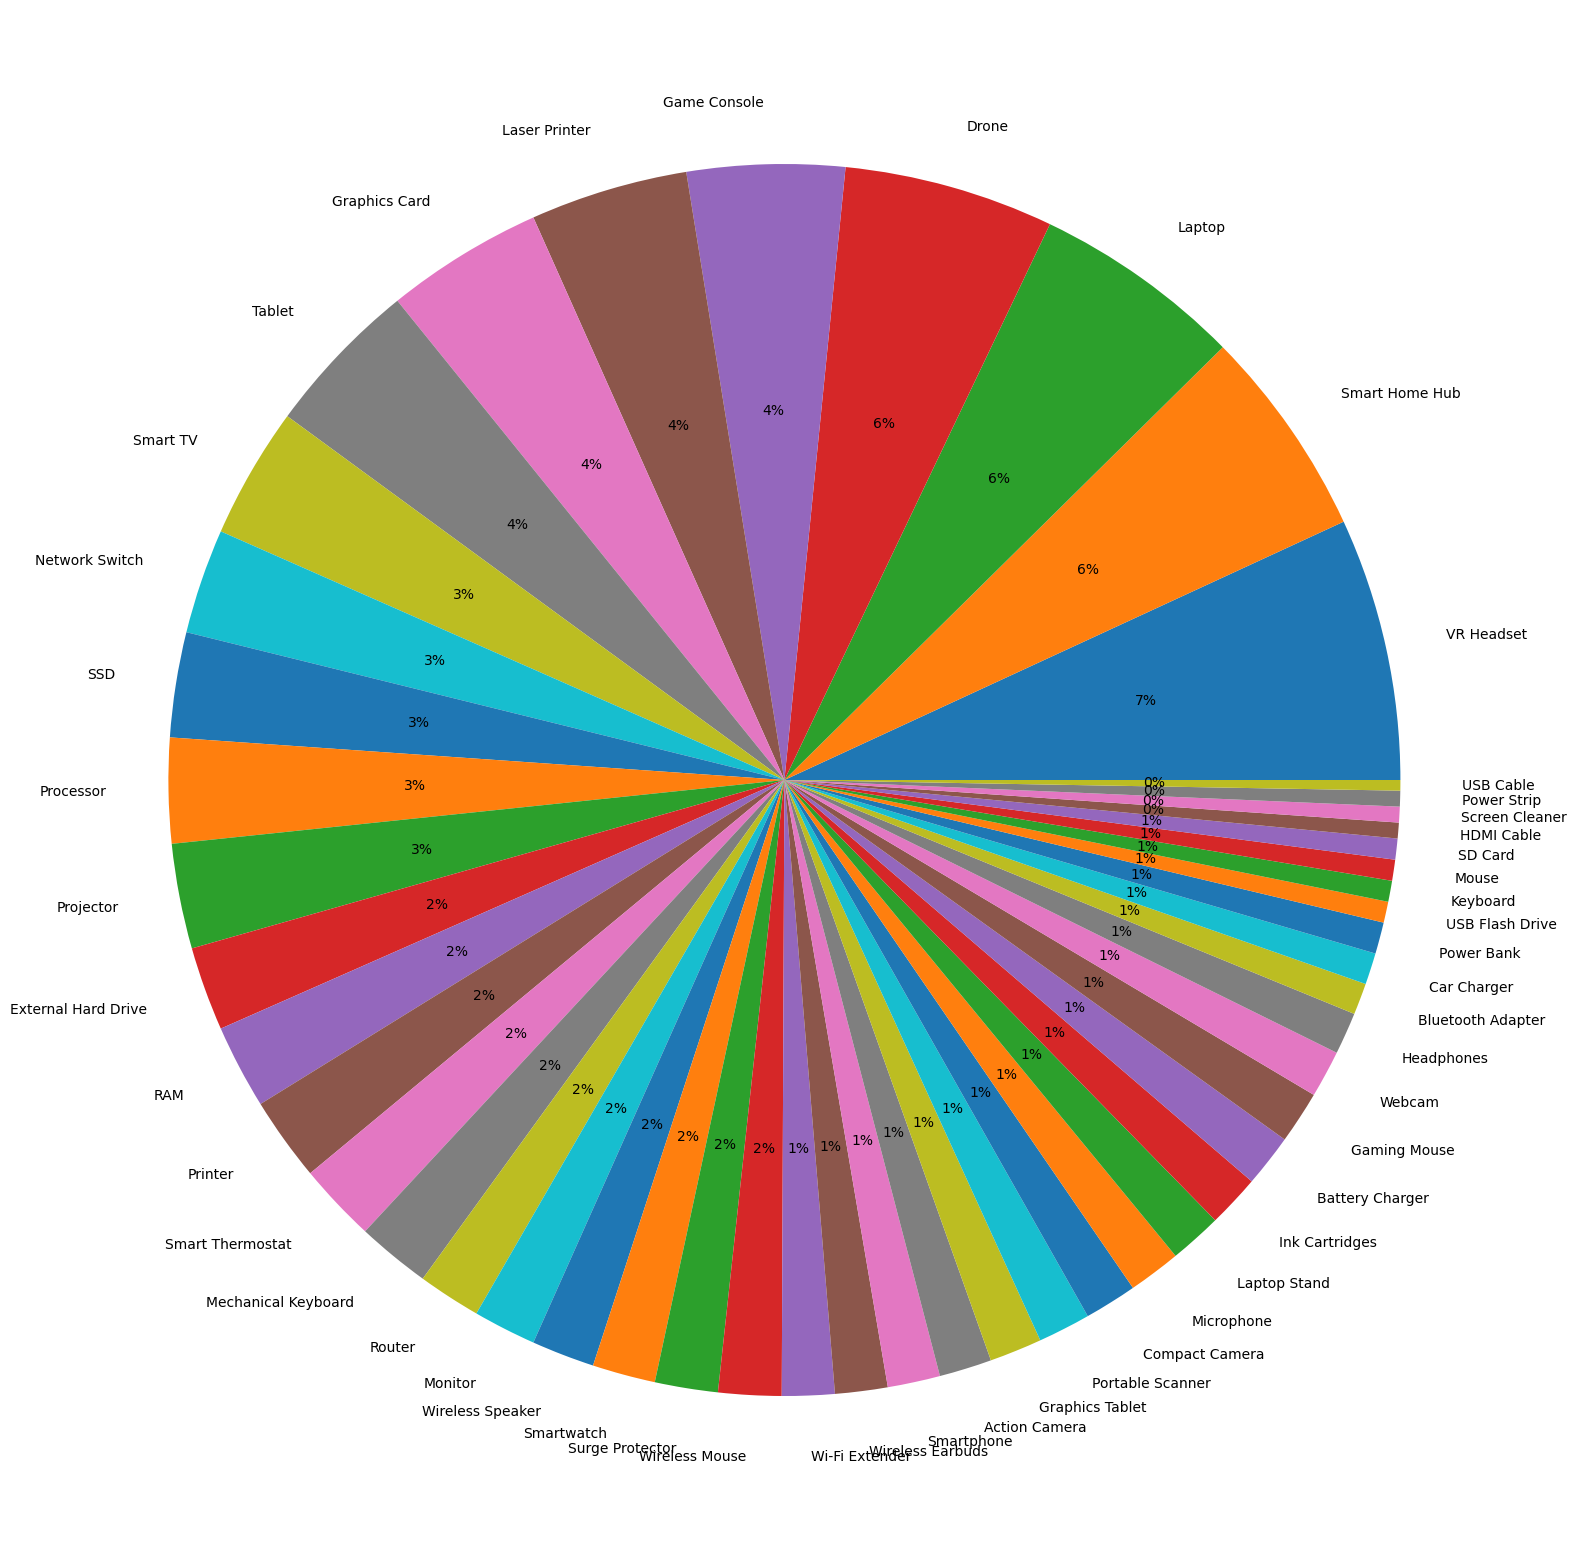

In [162]:
# graphique circulaire pour la repartition des ventes par produits
v=ventes_produits.reset_index()
plt.figure(figsize=(35,20))
plt.pie(x=v['quantite'], labels=v['Product'], autopct='%.0f%%')

plt.show()